# ΕΠΙΣΚΟΠΗΣΗ ΣΤΑΤΙΣΤΙΚΗΣ ΜΕ PYTHON

In [1]:
import pandas as pd
from numpy import *
import scipy as sp
from pandas import *
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
from ggplot import *
import pandas.rpy.common as com
import matplotlib.pyplot as plt
%matplotlib inline
# pd.options.display.mpl_style = 'default'
plt.style.use('ggplot')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


In [2]:
def plots(data,var):
    fig=plt.figure(figsize=(7,42))

    fig.add_subplot(6,1,1)
    plt.title('Plot')
    data[var].plot()

    fig.add_subplot(6,1,2)
    plt.title('Bar Plot')
    data[var].plot.bar()

    fig.add_subplot(6,1,3)
    plt.title('Pie Plot')
    data[var].plot.pie()

    fig.add_subplot(6,1,4)
    plt.title('Kernel Density Estimate Plot')
    data[var].plot.density()

    fig.add_subplot(6,1,5)
    plt.title('Histogram')
    data[var].plot.hist()
    
    fig.add_subplot(6,1,6)
    plt.title('Box Plot')
    data[var].plot.box()

## ΠΡΩΤΟ ΠΑΡΑΔΕΙΓΜΑ: Τα δεδομένα mtcars

RDatasets from https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [3]:
mtcars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")
print mtcars.columns
mtcars.shape

Index([u'Unnamed: 0', u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec',
       u'vs', u'am', u'gear', u'carb'],
      dtype='object')


(32, 12)

In [5]:
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


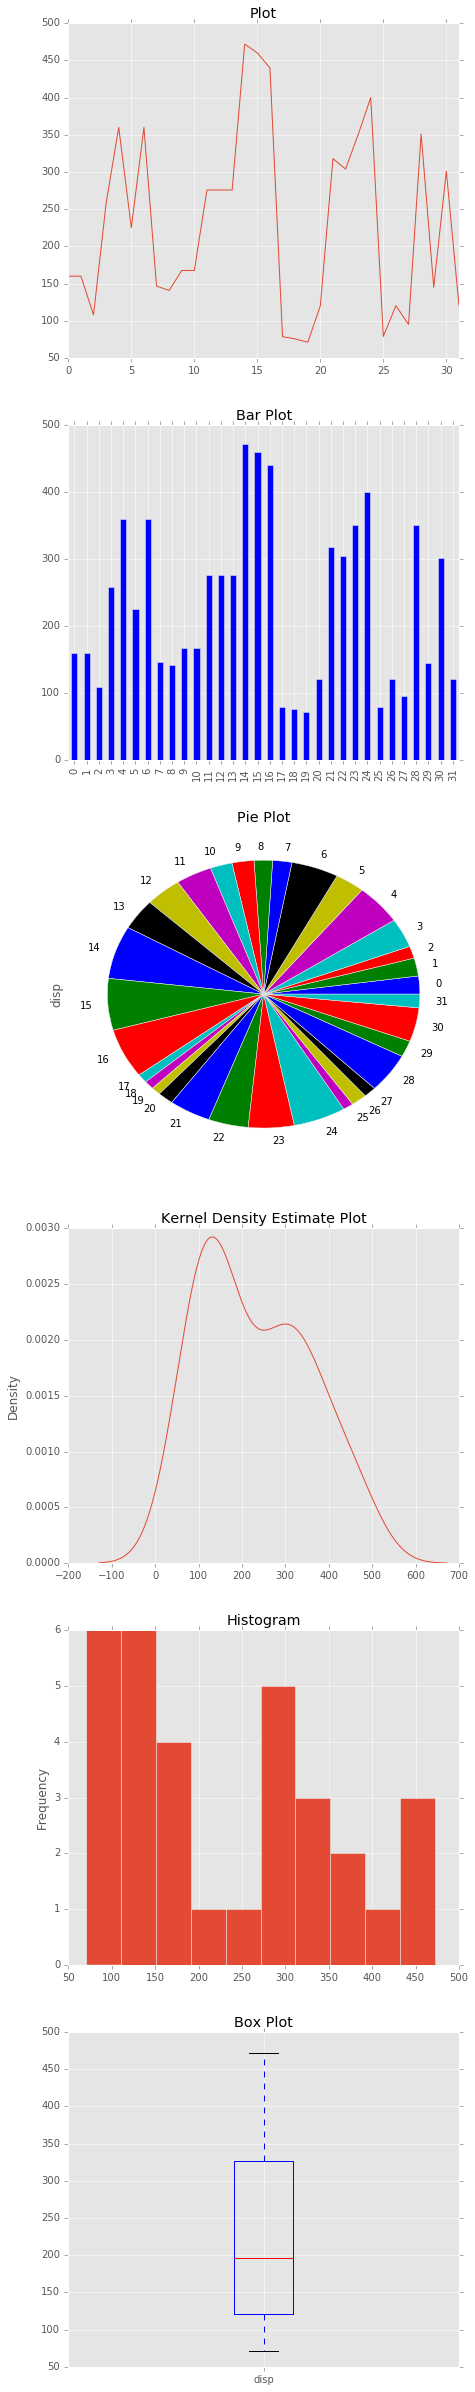

In [4]:
plots(mtcars,'disp')

In [7]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [8]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [9]:
mtcars.corr() > 0.5

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,True,False,False,False,True,False,False,True,True,False,False
cyl,False,True,True,True,False,True,False,False,False,False,True
disp,False,True,True,True,False,True,False,False,False,False,False
hp,False,True,True,True,False,True,False,False,False,False,True
drat,True,False,False,False,True,False,False,False,True,True,False
wt,False,True,True,True,False,True,False,False,False,False,False
qsec,False,False,False,False,False,False,True,True,False,False,False
vs,True,False,False,False,False,False,True,True,False,False,False
am,True,False,False,False,True,False,False,False,True,True,False
gear,False,False,False,False,True,False,False,False,True,True,False


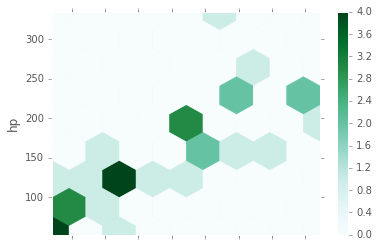

In [10]:
mtcars.plot(kind='hexbin', x='disp', y='hp', gridsize=8)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


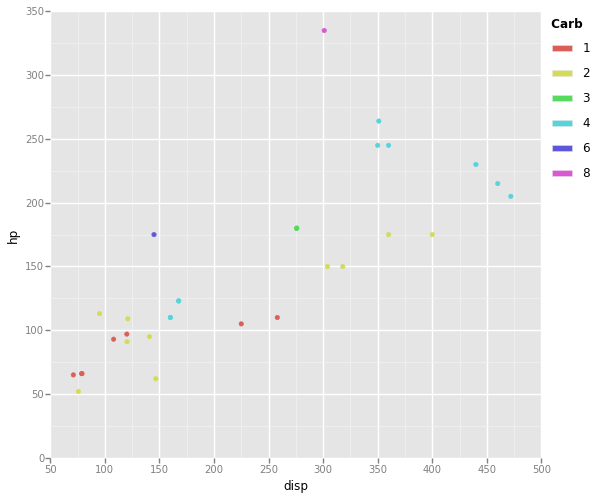

<ggplot: (8739037710981)>

In [11]:
p = ggplot(aes(x='disp', y='hp',color="carb"), data=mtcars)
p + geom_point()

## ΔΕΥΤΕΡΟ ΠΑΡΑΔΕΙΓΜΑ: Τα δεδομένα diamonds

In [5]:
diamonds = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv")
print diamonds.columns
print diamonds.shape
print len(diamonds)
diamonds.info() 

Index([u'Unnamed: 0', u'carat', u'cut', u'color', u'clarity', u'depth',
       u'table', u'price', u'x', u'y', u'z'],
      dtype='object')
(53940, 11)
53940
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [12]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61,338,4.00,4.05,2.39


In [13]:
rows = np.random.choice(diamonds.index.values, round(0.0001*len(diamonds)))
print rows

[43044 14017 42996 53531 15133]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [14]:
diamonds.ix[rows]

,carat,cut,color,clarity,depth,table,price,x,y,z
43044,0.51,Ideal,H,VS2,61.6,55,1375,5.16,5.19,3.19
14017,1.01,Good,G,VS2,57.5,62,5701,6.58,6.53,3.77
42996,0.55,Ideal,F,SI1,61.0,58,1368,5.25,5.28,3.21
53531,0.71,Ideal,D,SI2,61.6,56,2690,5.78,5.82,3.57
15133,1.25,Premium,I,VS2,61.0,59,6084,6.98,6.89,4.23


In [15]:
diamonds = diamonds.dropna(how='any') 

In [ ]:
# plots(diamonds,'price')

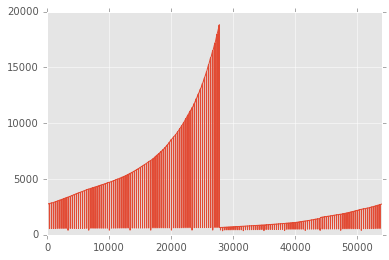

In [6]:
diamonds['price'].plot()

(array([ 25335.,   9328.,   7393.,   3878.,   2364.,   1745.,   1306.,
          1002.,    863.,    726.]),
 array([   326. ,   2175.7,   4025.4,   5875.1,   7724.8,   9574.5,
         11424.2,  13273.9,  15123.6,  16973.3,  18823. ]),
 <a list of 10 Patch objects>)

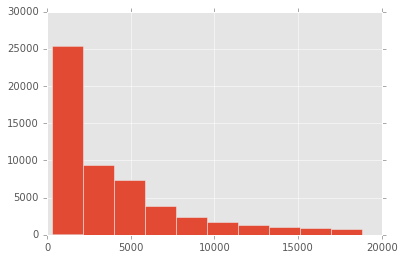

In [8]:
plt.hist(diamonds.price)

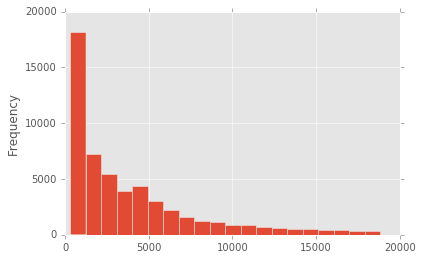

In [9]:
plt.figure()
diamonds['price'].plot(kind='hist', stacked=True, bins=20)

{'boxes': [<matplotlib.lines.Line2D at 0x7f38a73f76d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f38a7406510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f38a724d810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f38a724d1d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f38a73f77d0>,
  <matplotlib.lines.Line2D at 0x7f38a73f7e90>]}

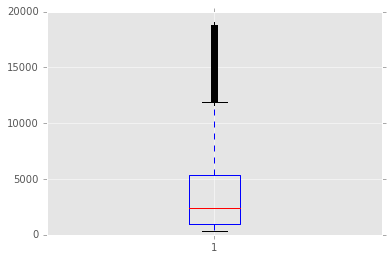

In [10]:
plt.boxplot(diamonds.price)

In [14]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
diamonds.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [16]:
diamonds.corr() > 0.5

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,True,False,False,False,False,False,False,False
carat,False,True,False,False,True,True,True,True
depth,False,False,True,False,False,False,False,False
table,False,False,False,True,False,False,False,False
price,False,True,False,False,True,True,True,True
x,False,True,False,False,True,True,True,True
y,False,True,False,False,True,True,True,True
z,False,True,False,False,True,True,True,True


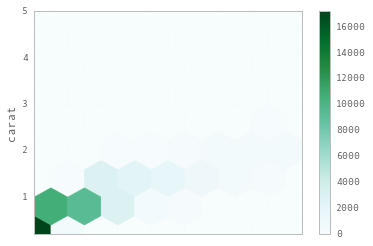

In [17]:
diamonds.plot(kind='hexbin', x='price', y='carat', gridsize=8)

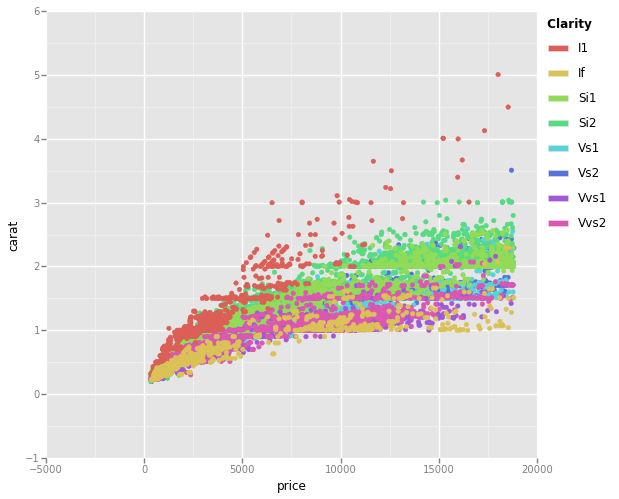

<ggplot: (8782504967677)>

In [30]:
p = ggplot(aes(x='price', y='carat',color="clarity"), data=diamonds)
p + geom_point()

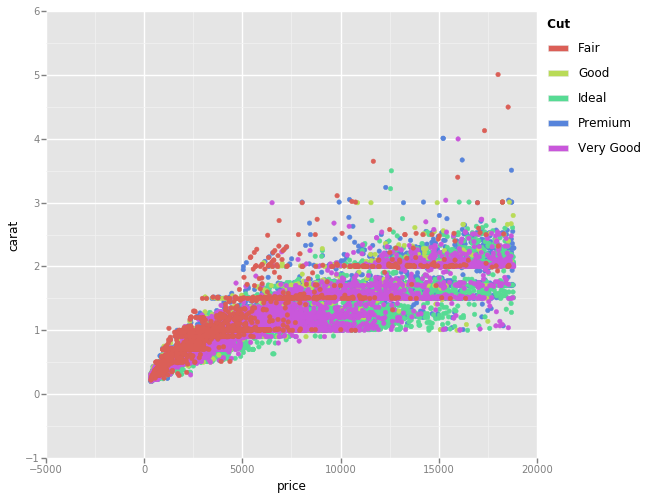

<ggplot: (8782504589705)>

In [31]:
p = ggplot(aes(x='price', y='carat',color="cut"), data=diamonds)
p + geom_point()

## ΤΡΙΤΟ ΠΑΡΑΔΕΙΓΜΑ: Τα δεδομενα central.park

Data from R library UsingR 

* https://cran.r-project.org/web/packages/UsingR/UsingR.pdf 
* https://cran.r-project.org/doc/contrib/usingR.pdf

In [13]:
ro.r('library(UsingR)')
ro.r('data(central.park)')
centralpark = com.load_data('central.park')
print centralpark.columns
centralpark.shape

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: MASS

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: HistData

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: Hmisc

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: grid

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lattice

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading 

Index([u'DY', u'MAX', u'MIN', u'AVG', u'DEP', u'HDD', u'CDD', u'WTR', u'SNW',
       u'DPTH', u'SPD', u'SPD1', u'DIR', u'MIN2', u'PSBL', u'S.S', u'WX',
       u'SPD3', u'DR'],
      dtype='object')


/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:survival’:

    cancer


  res = super(Function, self).__call__(*new_args, **new_kwargs)


(31, 19)

In [19]:
centralpark

,DY,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,DPTH,SPD,SPD1,DIR,MIN2,PSBL,S.S,WX,SPD3,DR
1,1,72,51,62,4,3,0,0.04,0,0,5.8,12,180,0,0,5,18,17,170
2,2,75,52,64,6,1,0,0.29,0,0,7.0,17,160,M,M,4,1,22,350
3,3,65,50,58,0,7,0,0.00,0,0,8.5,16,40,M,M,4,NaN,26,40
4,4,63,48,56,-3,9,0,0.00,0,0,2.8,10,150,M,M,0,NaN,14,190
5,5,59,45,52,-7,13,0,0.05,0,0,4.6,13,160,M,M,4,1,17,130
6,6,61,45,53,-7,12,0,0.00,0,M,4.5,10,90,0,0,7,18,14,70
7,7,79,54,67,7,0,2,0.16,0,M,5.3,14,50,0,0,1,18,17,60
8,8,60,53,57,-3,8,0,0.19,0,0,8.0,17,70,0,0,10,1,25,70
9,9,66,51,59,-1,6,0,0.02,0,0,4.5,12,220,0,0,6,18,16,230
10,10,71,50,61,0,4,0,0.00,0,0,3.7,12,220,0,0,2,18,17,220


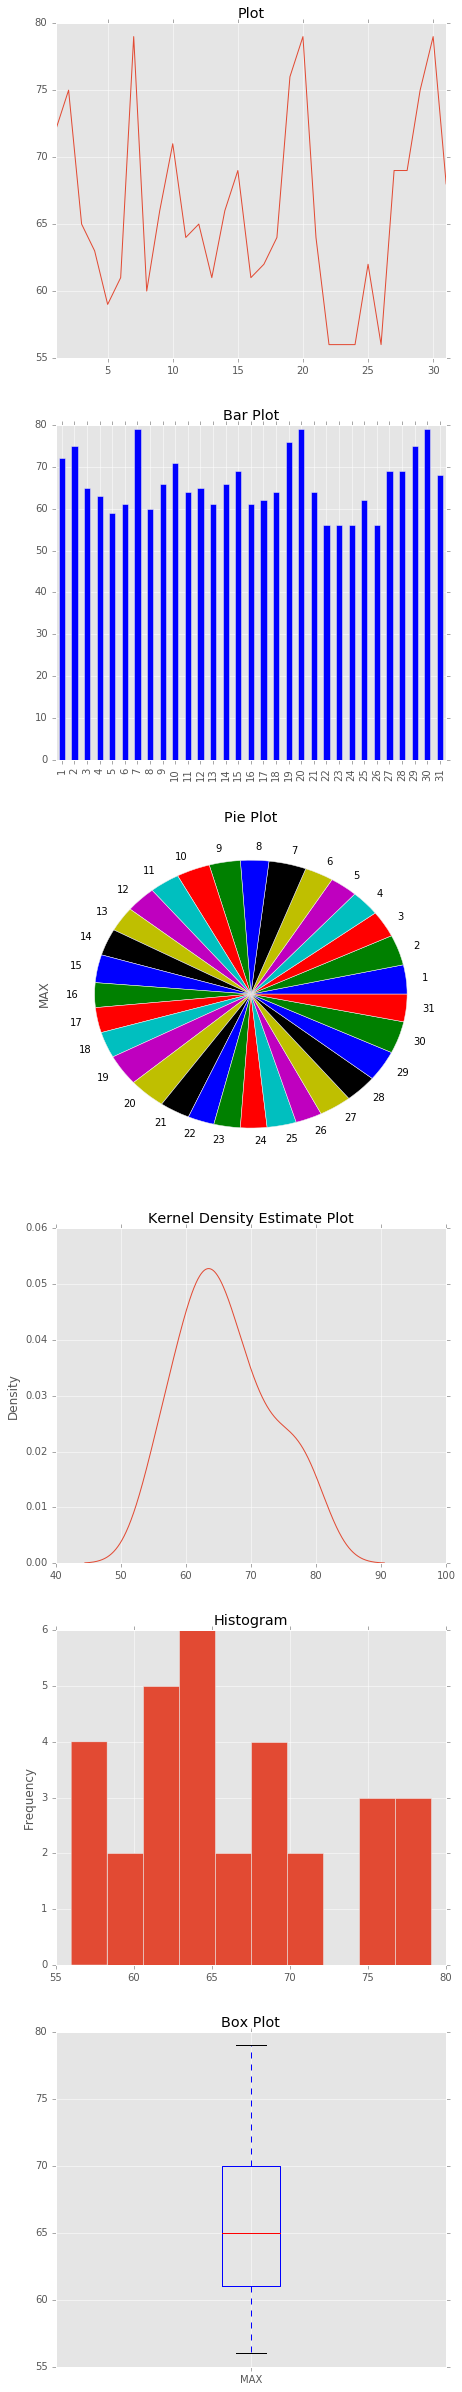

In [14]:
plots(centralpark,'MAX')

In [21]:
centralpark.describe()

,DY,MAX,MIN,AVG,DEP,HDD,CDD,SNW,SPD,SPD1,DIR,S.S,WX,SPD3,DR
count,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31,31.000000,31.000000,31.000000,31.000000,21.000000,31.000000,31.000000
mean,16.000000,66.064516,51.290323,59.00000,-3.612903,6.290323,0.290323,0,6.267742,15.096774,148.064516,5.032258,9.904762,20.903226,151.290323
std,9.092121,7.013965,3.551465,4.64758,5.057519,4.100354,1.006431,0,2.474320,3.977896,83.443368,3.692189,8.700027,5.647152,87.739840
min,1.000000,56.000000,45.000000,52.00000,-12.000000,0.000000,0.000000,0,2.800000,10.000000,40.000000,0.000000,1.000000,14.000000,40.000000
25%,8.500000,61.000000,50.000000,55.00000,-7.000000,3.000000,0.000000,0,4.500000,12.000000,65.000000,1.500000,1.000000,17.000000,70.000000
50%,16.000000,65.000000,51.000000,59.00000,-3.000000,6.000000,0.000000,0,5.700000,14.000000,140.000000,5.000000,18.000000,18.000000,140.000000
75%,23.500000,70.000000,53.000000,62.00000,-1.500000,10.000000,0.000000,0,7.900000,17.000000,225.000000,8.000000,18.000000,25.000000,225.000000
max,31.000000,79.000000,61.000000,70.00000,7.000000,13.000000,5.000000,0,13.300000,26.000000,290.000000,10.000000,18.000000,37.000000,350.000000


In [22]:
centralpark.corr()

,DY,MAX,MIN,AVG,DEP,HDD,CDD,SNW,SPD,SPD1,DIR,S.S,WX,SPD3,DR
DY,1.000000,0.001568,0.463503,0.175122,-0.403767,-0.144846,0.218565,NaN,0.053489,0.162208,0.078646,0.045676,0.055841,0.151915,-0.035099
MAX,0.001568,1.000000,0.460888,0.935641,0.860015,-0.925577,0.549739,NaN,-0.538248,-0.481699,0.419401,-0.675840,0.599752,-0.445023,0.390390
MIN,0.463503,0.460888,1.000000,0.741157,0.435218,-0.699554,0.572485,NaN,-0.105490,0.002664,0.345027,-0.005822,0.338373,0.016406,0.396697
AVG,0.175122,0.935641,0.741157,1.000000,0.828185,-0.981281,0.619994,NaN,-0.455378,-0.367814,0.446955,-0.512828,0.572913,-0.335294,0.452861
DEP,-0.403767,0.860015,0.435218,0.828185,1.000000,-0.830188,0.442145,NaN,-0.461121,-0.431053,0.369119,-0.496943,0.483839,-0.395462,0.446541
HDD,-0.144846,-0.925577,-0.699554,-0.981281,-0.830188,1.000000,-0.457287,NaN,0.468152,0.382424,-0.464963,0.518980,-0.575940,0.339549,-0.486579
CDD,0.218565,0.549739,0.572485,0.619994,0.442145,-0.457287,1.000000,NaN,-0.195560,-0.140469,0.169651,-0.253775,0.282038,-0.164976,0.108861
SNW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPD,0.053489,-0.538248,-0.105490,-0.455378,-0.461121,0.468152,-0.195560,NaN,1.000000,0.795512,-0.433960,0.615655,-0.586482,0.762438,-0.330377
SPD1,0.162208,-0.481699,0.002664,-0.367814,-0.431053,0.382424,-0.140469,NaN,0.795512,1.000000,-0.353910,0.569440,-0.473980,0.957527,-0.230538


In [23]:
centralpark.corr() > 0.5

,DY,MAX,MIN,AVG,DEP,HDD,CDD,SNW,SPD,SPD1,DIR,S.S,WX,SPD3,DR
DY,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MAX,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False
MIN,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
AVG,False,True,True,True,True,False,True,False,False,False,False,False,True,False,False
DEP,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False
HDD,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
CDD,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False
SNW,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
SPD,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False
SPD1,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False


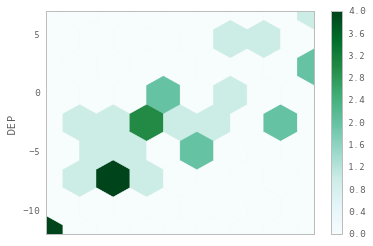

In [24]:
centralpark.plot(kind='hexbin', x='MAX', y='DEP', gridsize=8)

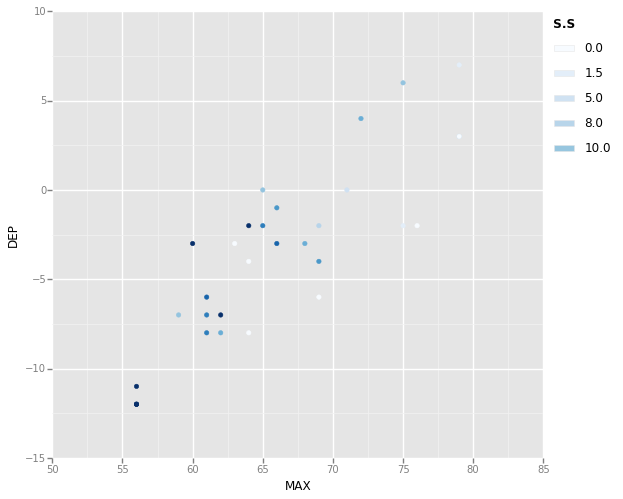

<ggplot: (8782504815489)>

In [32]:
p = ggplot(aes(x='MAX', y='DEP',color="S.S"), data=centralpark)
p + geom_point()